#### Decision Tree Classifier

In [8]:
##Import Required Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import time


In [9]:
## Importing Iris Data Set
Full_data= load_iris()
#print(Full_data)

## Seperating data and target values from dataset
Main_data = Full_data['data']
#print(len(Main_data))
Class = Full_data['target']

## Converting to dataframes and assigning column names
data_df= pd.DataFrame(Main_data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
class_df=pd.DataFrame(Class, columns=['Class'])

##Replacing Class values with actual category
setosa_df = class_df.replace(to_replace=[0], value='Setosa', regex=True)
versicolor_df = setosa_df.replace(to_replace=[1], value='versicolor', regex=True)
class_name_df = versicolor_df.replace(to_replace=[2], value='virginica', regex=True)
#print(class_name_df)

##Combining data Dataframe with class dataframe 
F1_df = pd.concat([data_df.reset_index(drop=True), class_df.reset_index(drop=True)], axis=1)        #Without class names
print(F1_df)
print('-------------------------------------------------------------------------------------')
F2_df = pd.concat([data_df.reset_index(drop=True), class_name_df.reset_index(drop=True)], axis=1)     #With class names
print(F2_df)

##Using iloc
data_df= F1_df.iloc[:, :-1].values
class_df = F1_df.iloc[:, 4].values


     sepal length  sepal width  petal length  petal width  Class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]
-------------------------------------------------------------------------------------
     sepal length  sepal width  petal length  petal width      Class
0             5.1          3.5           

In [10]:
## Divide the data int train nand test data
full_train_data, full_test_data, full_train_class, full_test_class = train_test_split(data_df, class_df, test_size=0.2, train_size=0.8, random_state=42)

In [11]:
#Decision Tree Implementation
MA_list=[]                       #Mean Accuracy List
depths= [3, 5, 10, None]
feature_cols=['sepal length', 'sepal width', 'petal length', 'petal width']
start = time.time()
for i in range(len(depths)):    
    DT_classifier = DecisionTreeClassifier(max_depth=depths[i], random_state=42 ) #Creating a classfier
    Values = cross_val_score(DT_classifier, full_train_data, full_train_class, cv=10) #10Fold Cross Validation
    print('\n')
    mean_accuracy=Values.mean()*100     #Mean of Scores is Accuracy
    print('For depth = %s' %depths[i])
    print("Mean Accuracy is: %.3f"  %mean_accuracy, '%')
    end = (time.time() - start)
    print('Time: ', end)
    print('---------------------------------------------------------------------------')
    MA_list.append(mean_accuracy)
    
print('Accuracy List is: ', MA_list)



For depth = 3
Mean Accuracy is: 93.333 %
Time:  0.010969400405883789
---------------------------------------------------------------------------


For depth = 5
Mean Accuracy is: 91.667 %
Time:  0.020941734313964844
---------------------------------------------------------------------------


For depth = 10
Mean Accuracy is: 92.500 %
Time:  0.030951261520385742
---------------------------------------------------------------------------


For depth = None
Mean Accuracy is: 92.500 %
Time:  0.04191851615905762
---------------------------------------------------------------------------
Accuracy List is:  [93.33333333333333, 91.66666666666666, 92.49999999999999, 92.49999999999999]


In [12]:
#Converting accuracy list and depth values list to dataframes for plotting
d=[3 ,5, 10, 0]
depth_df = pd.DataFrame(d, columns=['Depth_Value'])

Acc_df = pd.DataFrame(MA_list, columns=['Accuracy'])

depth_Acc_df = pd.concat([depth_df.reset_index(drop=True),Acc_df.reset_index(drop=True)], axis=1)
print(depth_Acc_df)



   Depth_Value   Accuracy
0            3  93.333333
1            5  91.666667
2           10  92.500000
3            0  92.500000


### In plot, 0 means None (Till Last Leaf)

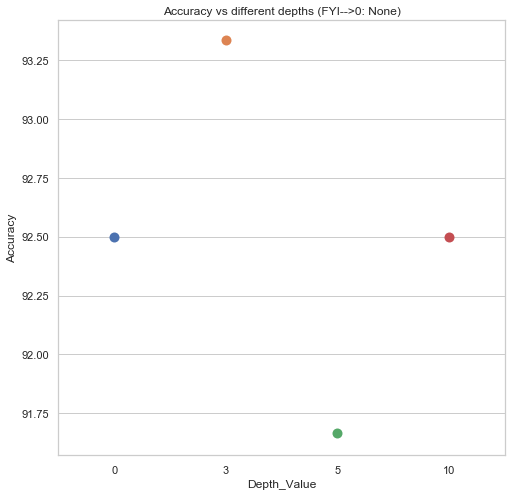

In [14]:
##Seaborn Plot
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(8,8))
sns.swarmplot('Depth_Value', 'Accuracy', data=depth_Acc_df, size =10)
plt.title('Accuracy vs different depths (FYI-->0: None)')
plt.show()

#### Following are the observations:

1) Maximum Accuracy of 93.33% is obtained for depth = 3 with training data.

2) **FYI: In plot, '0' refers to depth = 'None' (untill end)**

3) If you take depth = 3 and perform classification on test data, we will get 100 percent accuracy. That's because we have a very small test data (20%: 30 samples out of 150). If you change the test_train dataset division to 60-40 percent, classifier accuracy will be declined to 98.33% i.e. depth =3 will not be sufficient for the classifier to learn data and perform successfull classification (misclassification will be present as confirmed from confusion matrix). [Refer next 2 blocks of code for detailed analysis.]

4) At depth =1, 2, classifier accuracy with testing data is less because of Underfitting i.e. classifier doesn't have enough depth to construct sufficient trees with enough data to learn how to predict the target class for new data. As you increase the depth, underfitting problem gets resolved and accuracy increases (which is exactly happened in our case) [Refer last section of the code for clarification]

5) In the above plot ,
-	At depth = 1,2, Decision Tree classifier produces a tree with one decision function (Petal Length) which is not enough for the classifier to perform classification and end up with an accuracy of 90% on Validation Data. In another words, classifier doesn’t have enough data to learn and predict the results i.e. Underfitting has occurred.












-	At depth = 3, Decision Tree Classifier takes into account petal length and petal width decision functions which were considered as best features to perform the classification and obtained an accuracy of 93.33% on validation data (though there will be misclassification as there was minor overlapping between Versicolor and Virginica) [Refer to Pair plots comments]











-	At depth= [10, None], classifier would go into too much depth creating multiple decision functions, that means classifier would narrow down the validation data and will make too much accurate predictions or decision boundary will be extremely smooth, so when tested on an unseen data, classifier will give 100 percent accuracy which is the case of Overfitting. Accuracy with depth on Validation Data: [10, None] = 92.5%.


















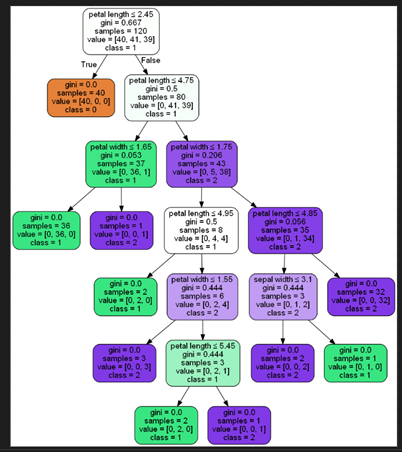

#### Clarification for point 3

In [15]:
##Testing depth =3 on test data and getting 100 percent accuracy
C = DecisionTreeClassifier(max_depth = 3, random_state=42)
C.fit(full_train_data, full_train_class)
prediction_value = C.predict(full_test_data)
Accuracy = accuracy_score(full_test_class, prediction_value)*100
cr = classification_report(full_test_class, prediction_value)
cn = confusion_matrix(full_test_class, prediction_value)
print('Accuracy with depth =3 on test data is: ', Accuracy)
print('Classification Report is:\n', cr)
print('Confusion Matrix is:\n', cn)
print('\n---------------------------------------------------------------------------------------------------')

Accuracy with depth =3 on test data is:  100.0
Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix is:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

---------------------------------------------------------------------------------------------------


In [16]:
##Changing Test_train data split to 60-40 and then taking depth =3 on test data. (Results in Misclassification)
train_data, test_data, train_class, test_class = train_test_split(data_df, class_df, test_size=0.4, random_state=42)
C_new = DecisionTreeClassifier(max_depth = 3, random_state=42)
C_new.fit(train_data, train_class)
prediction_value = C_new.predict(test_data)
Accuracy_new = accuracy_score(test_class, prediction_value)*100
cr_new = classification_report(test_class, prediction_value)
cn_new = confusion_matrix(test_class, prediction_value)
print('Accuracy with depth =3 on test data is: ', Accuracy_new)
print('Classification Report is:\n', cr_new)
print('Confusion Matrix is:\n', cn_new)

Accuracy with depth =3 on test data is:  98.33333333333333
Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix is:
 [[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


#### Clarification for Point 4

In [17]:
depth = [1,2]
for d in depth:
    C = DecisionTreeClassifier(max_depth = d, random_state=42)
    C.fit(full_train_data, full_train_class)
    prediction_value = C.predict(full_test_data)
    Accuracy = accuracy_score(full_test_class, prediction_value)
    cr = classification_report(full_test_class, prediction_value)
    cn = confusion_matrix(full_test_class, prediction_value)
    print('For d = %d' %d)
    print('Accuracy is: ', Accuracy)
    print('Classification Report is:\n', cr)
    print('Confusion Matrix is:\n', cn)
    print('-------------------------------------------------------------------')
    
##And at Depth =3 we received 100 percent accuracy.

For d = 1
Accuracy is:  0.6333333333333333
Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30

Confusion Matrix is:
 [[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]
-------------------------------------------------------------------
For d = 2
Accuracy is:  0.9666666666666667
Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97   

d:\657 Winter 2020 Assignments\657A\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
